In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import polyreg
import linearreg

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
def f(x):
    return 1 / (1 + x)

In [4]:
def sample(n):
    x = np.random.random(n) * 5
    y = f(x)
    return x, y

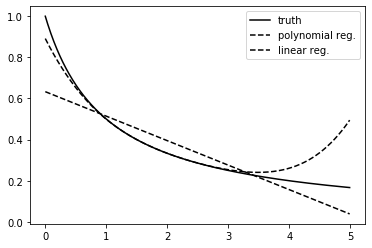

In [8]:
xx = np.arange(0, 5, 0.01)
np.random.seed(0)
y_poly_sum = np.zeros(len(xx))
y_lin_sum = np.zeros(len(xx))
n = 100000
warnings.filterwarnings("ignore")
for _ in range(n):
    x, y = sample(5)
    poly = polyreg.PolynomialRegression(4)
    poly.fit(x, y)
    lin = linearreg.LinearRegression()
    lin.fit(x, y)
    y_poly = poly.predict(xx)
    y_poly_sum += y_poly
    y_lin = lin.predict(xx.reshape(-1, 1))
    y_lin_sum += y_lin
    
plt.plot(xx, f(xx), label="truth", 
         color="k", linestyle="solid")
plt.plot(xx, y_poly_sum / n, label="polynomial reg.", 
         color="k", linestyle="dashed")
plt.plot(xx, y_lin_sum / n, label="linear reg.", 
         color="k", linestyle="dashed")
plt.legend()
plt.show()

In [ ]:
xx = np.arange(0, 5, 0.01)
np.random.seed()
y_poly_sum = np.zeros(len(xx))
y_poly_sum_sq = np.zeros(len(xx))
y_lin_sum = np.zeros(len(xx))
y_lin_sum_sq = np.zeros(len(xx))
y_true = f(xx)
n = 100000
warnings.filterwarnings("ignore")
for _ in range(n):
    x, y = sample(5)
    poly = polyreg.PolynomialRegression(4)
    poly.fit(x, y)
    lin = linearreg.LinearRegression()
    lin.fit(x, y)
    y_poly = poly.predict(xx)
    y_poly_sum += y_poly
    y_poly_sum_sq += (y_poly - y_true) ** 2
    y_lin = lin.predict(xx.reshape(-1, 1))
    y_lin_sum += y_lin
    y_lin_sum_sq += (y_lin - y_true)**2
    
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Linear reg.")
ax2.set_title("Polynomial reg.")
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
ax1.fill_between(xx, 0, (y_lin_sum / n - y_true)**2,\
                color="0.2", label="bias")
ax1.fill_between(xx, (y_lin_sum / n - y_true), y_lin_sum_sq /n,\
                 color="0.7", label="variance")
ax1.legend(loc="upper left")
ax2.fill_between(xx, 0, (y_poly_sum / n - y_true)**2,\
                color="0.2", label="bias")
ax2.fill_between(xx, (y_poly_sum / n - y_true), y_poly_sum_sq /n,\
                 color="0.7", label="variance")
ax2.legend(loc="upper left")
plt.show()